# Revisualization of exp003 in the 001_experiments DNN Project

6/22/18: We had initial results of improvement in classification based on augmented datasets with realistic time scaling tt. Here, we want to plot each patient of baseline vs. augmented to show either improvement, or decreased improvement.

- This will be preliminary results on showing improved convergence, stabilization in training, and higher end accuracy.

In [4]:
%matplotlib inline

# import resource 
# resource.setrlimit(resource.RLIMIT_NOFILE, (1000, -1))
# import basic functionality / libs
import sys
import os
import numpy as np
import pandas as pd
import json
import scipy
import pickle

# Import magic commands for jupyter notebook 
# - autoreloading a module
# - profiling functions for memory usage and scripts
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%load_ext memory_profiler

sys.path.append('../../../')
# import fragility related modules
import dnn
from dnn.base.utils.log_error import initialize_logger
from dnn.base.constants.config import Config
# from dnn.io.loadsimdataset import LoadSimDataset
# from dnn.io.loadresults import LoadResults

# import basic plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [40]:
# set configurations
patient = 'id001_bt'
patients = ['id001_ac', 'id002_cj', 'id008_gc', 'id010_js', 
            'id011_ml', 'id012_pc', 'id013_pg']
patient = 'id013_pg'

# which experimental set up do we want to compare with?
expname = 'exp003'

#  where to find the raw data for this patient
rawdatadir = os.path.join('/Volumes/ADAM LI/rawdata/old/',  patient)

output_folder = os.path.join(os.path.expanduser("~"), 'Documents', 'figures', 
        'exp001vs003_preliminary_results')

# configuration and plotting
config = Config(output_base=output_folder) 
config.figures.MATPLOTLIB_BACKEND="qt5" #"Qt4Agg" #"inline"
config.figures.SHOW_FLAG=True

# Import Baseline Data

In [26]:
expname = 'exp001'
print(expname)
loss = np.zeros((len(patients), 300))
acc = np.zeros(loss.shape)
val_acc = np.zeros(loss.shape)
val_loss = np.zeros(loss.shape)

# go through all patients
for idx, pat in enumerate(patients):
    # real data results directory
    resultsdir = os.path.join('/Volumes/ADAM LI/pydata/', 'dnn/output/001_experiments/', expname, pat)    
    resultfiles = [f for f in os.listdir(resultsdir) if f.endswith('.pkl')]
    
    # extract data from each training session
    for _file in resultfiles:
        histfile = os.path.join(resultsdir, _file)
        print(histfile)
        # load in the history file
        with open(histfile, "rb") as f:
            history = pickle.load(f)
        print(history.keys())
        print(len(history['loss']))
        
        loss[idx, :] = history['loss']
        acc[idx, :] = history['acc']
        val_acc[idx,:] = history['val_acc']
        val_loss[idx,:] = history['val_loss']

exp001
/Volumes/ADAM LI/pydata/dnn/output/001_experiments/exp001/id001_ac/2dcnn_history.pkl
dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])
300
/Volumes/ADAM LI/pydata/dnn/output/001_experiments/exp001/id002_cj/2dcnn_history.pkl
dict_keys(['val_acc', 'loss', 'acc', 'val_loss'])
300
/Volumes/ADAM LI/pydata/dnn/output/001_experiments/exp001/id008_gc/2dcnn_history.pkl
dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])
300
/Volumes/ADAM LI/pydata/dnn/output/001_experiments/exp001/id010_js/2dcnn_history.pkl
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
300
/Volumes/ADAM LI/pydata/dnn/output/001_experiments/exp001/id011_ml/2dcnn_history.pkl
dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])
300
/Volumes/ADAM LI/pydata/dnn/output/001_experiments/exp001/id012_pc/2dcnn_history.pkl
dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])
300
/Volumes/ADAM LI/pydata/dnn/output/001_experiments/exp001/id013_pg/2dcnn_history.pkl
dict_keys(['loss', 'acc', 'val_acc', 'val_loss'])
300


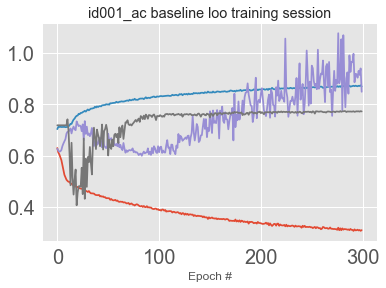

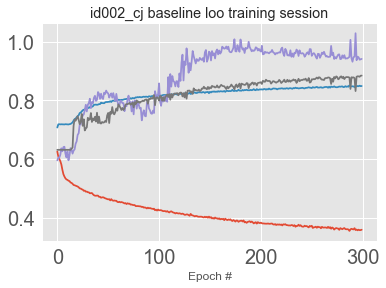

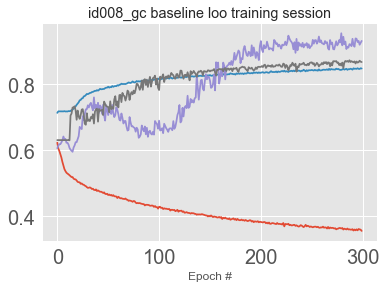

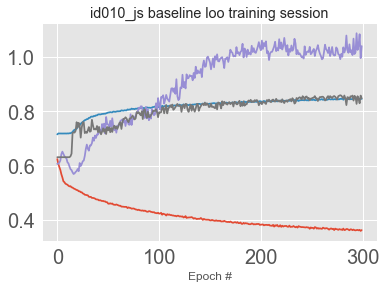

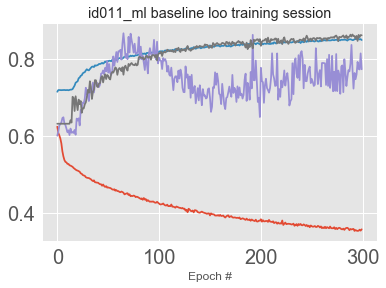

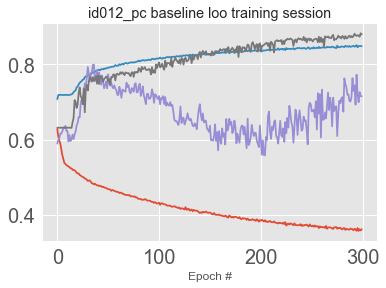

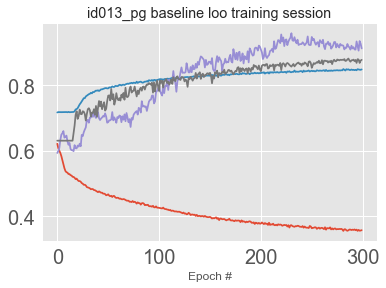

In [15]:
for idx, pat in enumerate(patients):
    plt.figure()
    plt.title('{} baseline loo training session'.format(pat))
    plt.plot(N, loss[idx,:], label="train_loss")
    plt.plot(N, acc[idx,:], label="train_acc")
    plt.plot(N, val_loss[idx,:], label="val_loss")
    plt.plot(N, val_acc[idx,:], label="val_acc")
    plt.xlabel('Epoch #')
    plt.ylim([-0.1, 1.1])

In [27]:
base_dict = {
    'loss': loss,
    'acc': acc,
    'val_loss': val_loss,
    'val_acc': val_acc
}

# Load in Augmented Session (exp003)

In [28]:
print(expname)
expname='exp002'
loss = np.zeros((len(patients), 300))
acc = np.zeros(loss.shape)
val_acc = np.zeros(loss.shape)
val_loss = np.zeros(loss.shape)

# go through all patients
for idx, pat in enumerate(patients):
    # real data results directory
    resultsdir = os.path.join('/Volumes/ADAM LI/pydata/', 'dnn/output/001_experiments/', expname, pat)    
    resultfiles = [f for f in os.listdir(resultsdir) if f.endswith('.pkl')]
    
    # extract data from each training session
    for _file in resultfiles:
        histfile = os.path.join(resultsdir, _file)

        # load in the history file
        with open(histfile, "rb") as f:
            history = pickle.load(f)
        print(history.keys())
        print(len(history['loss']))
        
        loss[idx, :] = history['loss']
        acc[idx, :] = history['acc']
        val_acc[idx,:] = history['val_acc']
        val_loss[idx,:] = history['val_loss']

exp001
dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])
300
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
300
dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])
300
dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])
300
dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])
300
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
300
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
300


In [29]:
augmented_dict = {
    'loss': loss,
    'acc': acc,
    'val_loss': val_loss,
    'val_acc': val_acc
}

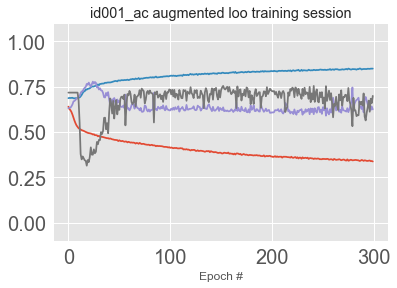

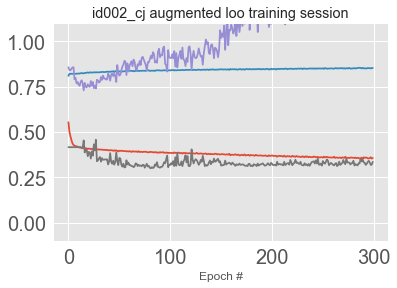

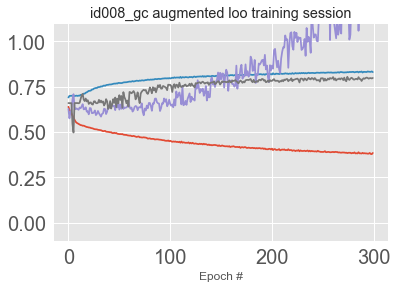

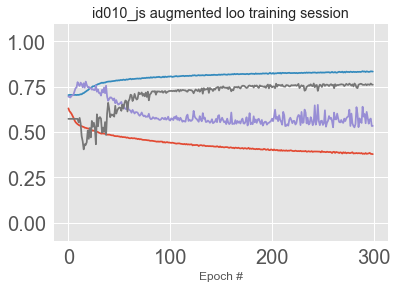

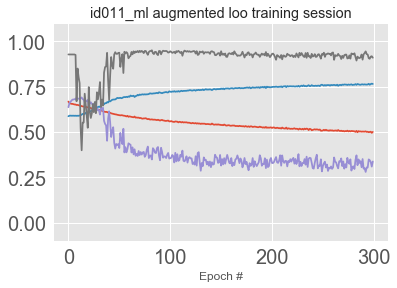

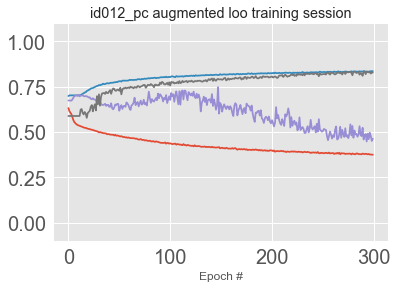

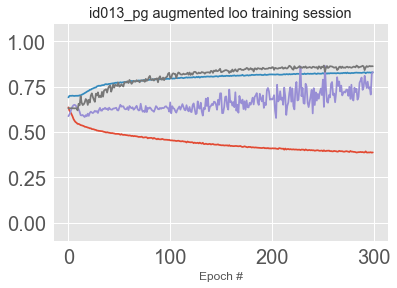

In [25]:
for idx, pat in enumerate(patients):
    plt.figure()
    plt.plot(N, loss[idx,:], label="train_loss")
    plt.plot(N, acc[idx,:], label="train_acc")
    plt.plot(N, val_loss[idx,:], label="val_loss")
    plt.plot(N, val_acc[idx,:], label="val_acc")
    plt.ylim([-0.1, 1.1])
    plt.title('{} augmented loo training session'.format(pat))
    plt.xlabel('Epoch #')

# Plot Each Patient Versus Baseline

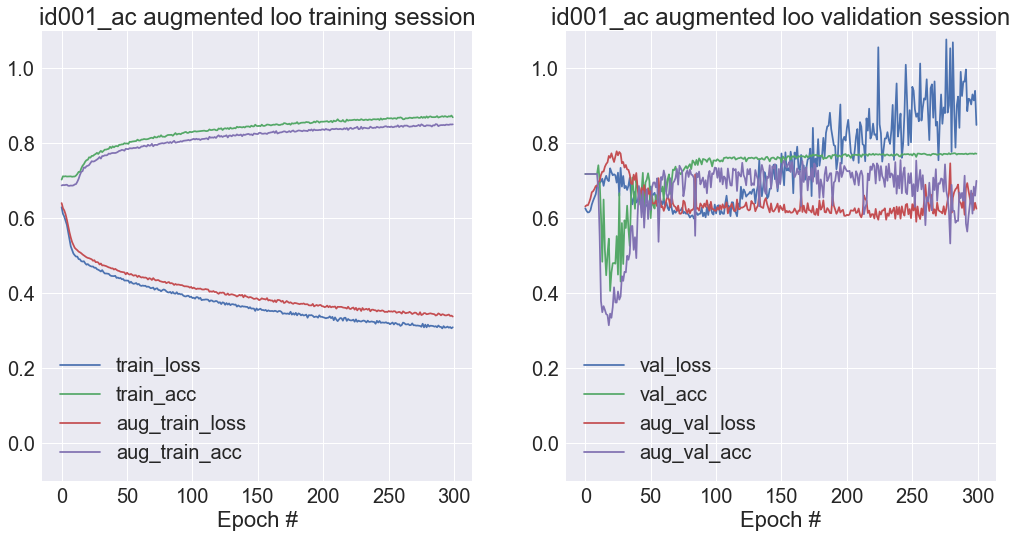

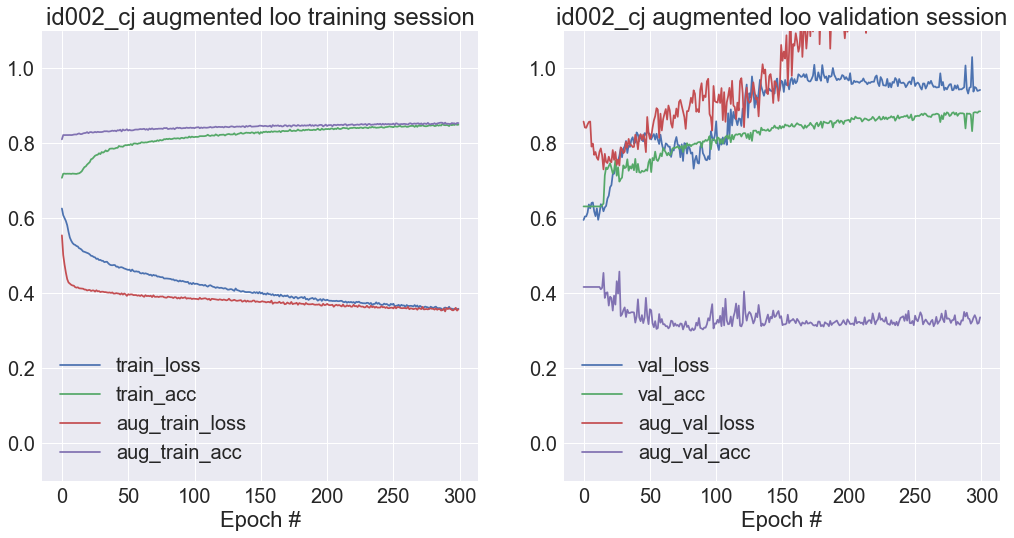

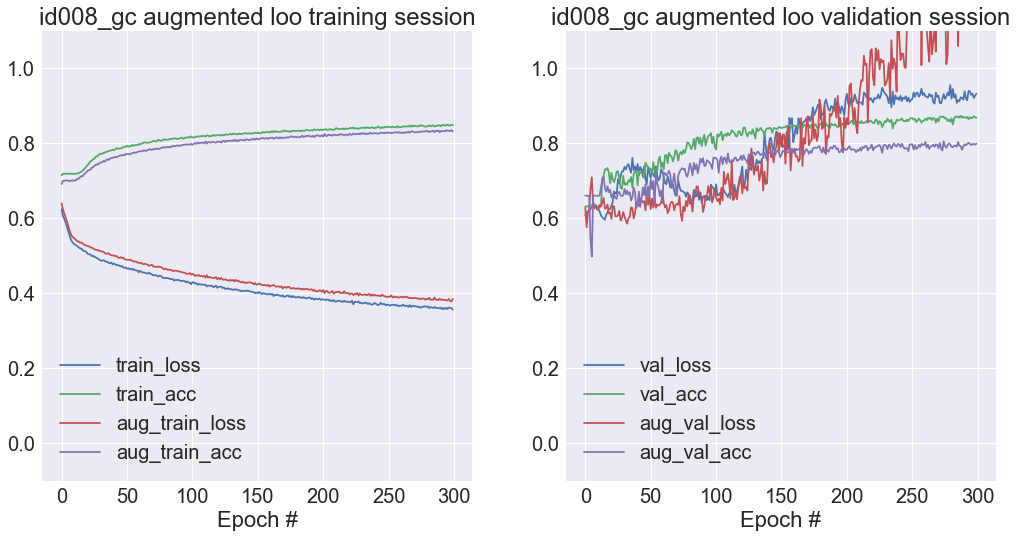

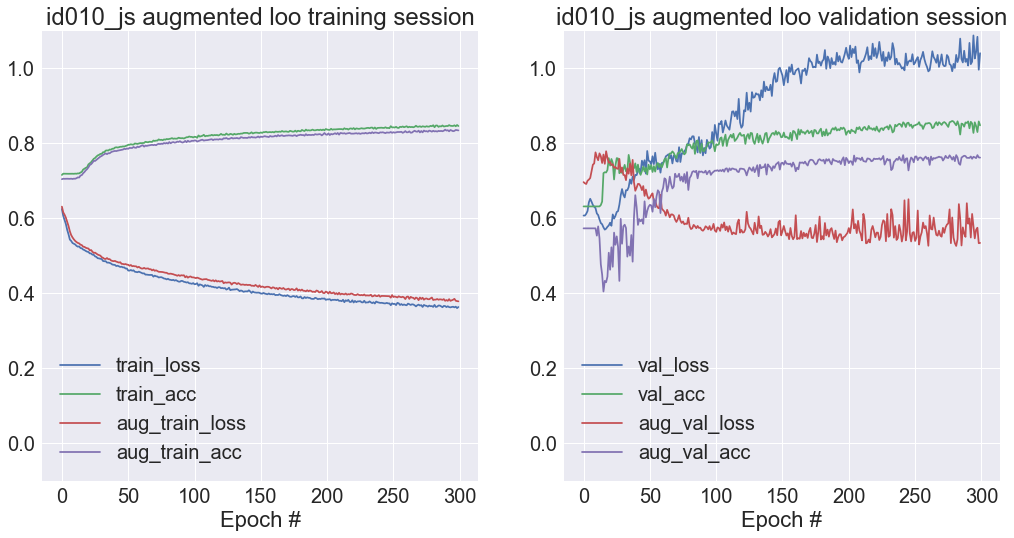

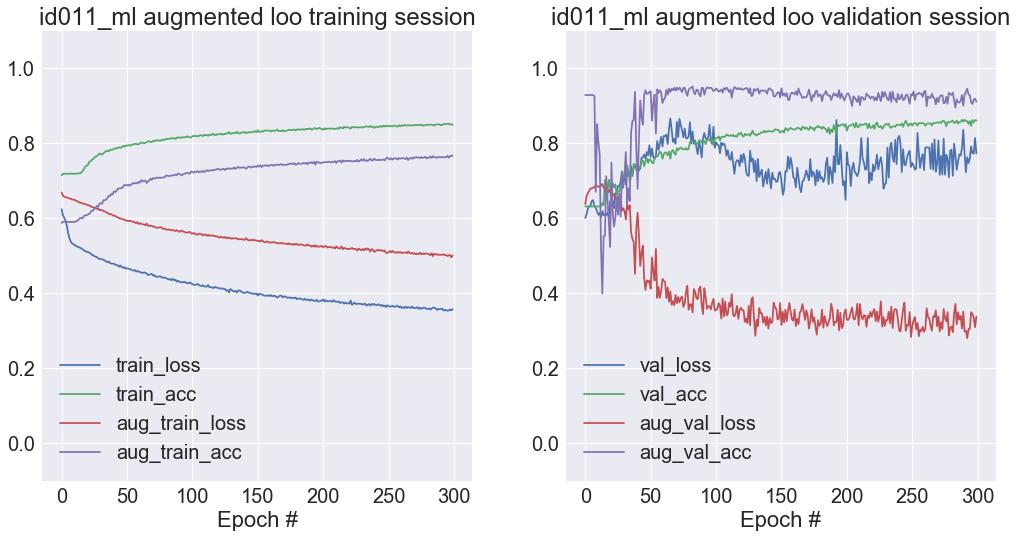

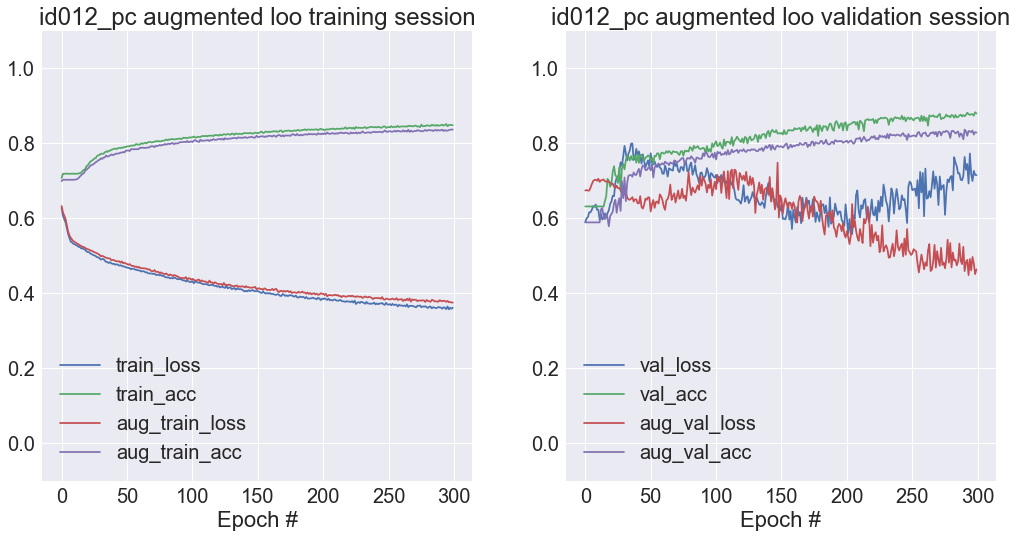

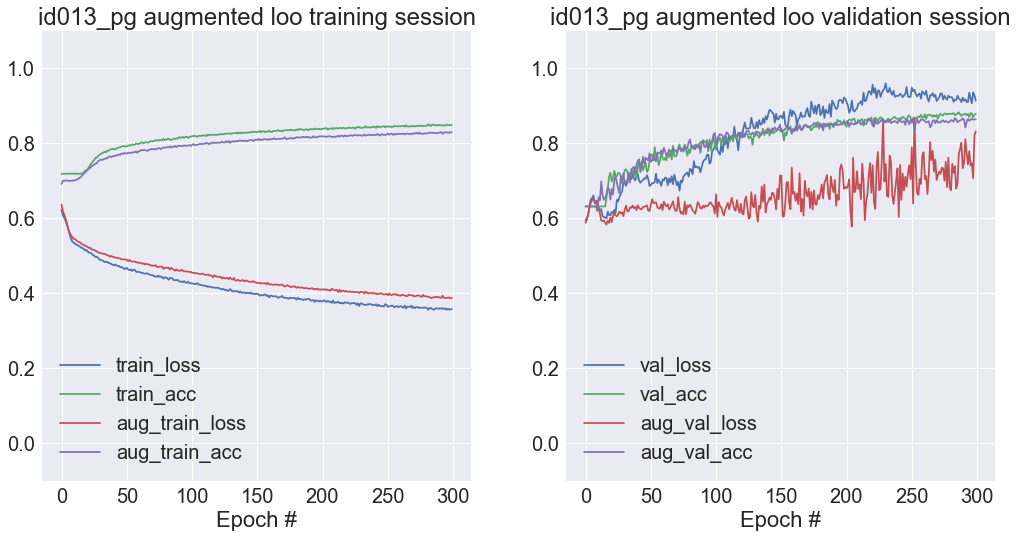

In [41]:
sns.set(font_scale=2)
for idx, pat in enumerate(patients):
    plt.figure(figsize=(15,8))
    plt.subplot(121)
    loss = base_dict['loss']
    acc = base_dict['acc']
    plt.plot(N, loss[idx,:], label="train_loss")
    plt.plot(N, acc[idx,:], label="train_acc")
    loss = augmented_dict['loss']
    acc = augmented_dict['acc']
    plt.plot(N, loss[idx,:], label="aug_train_loss")
    plt.plot(N, acc[idx,:], label="aug_train_acc")
    
    plt.title('{} augmented loo training session'.format(pat))
    plt.ylim([-0.1, 1.1])
    plt.xlabel('Epoch #')
    plt.legend()
    
    plt.subplot(122)
    val_loss = base_dict['val_loss']
    val_acc = base_dict['val_acc']
    plt.plot(N, val_loss[idx,:], label="val_loss")
    plt.plot(N, val_acc[idx,:], label="val_acc")
    
    val_loss = augmented_dict['val_loss']
    val_acc = augmented_dict['val_acc']
    plt.plot(N, val_loss[idx,:], label="aug_val_loss")
    plt.plot(N, val_acc[idx,:], label="aug_val_acc")
    
    plt.title('{} augmented loo validation session'.format(pat))
    plt.ylim([-0.1, 1.1])
    plt.xlabel('Epoch #')
    plt.legend()
    plt.tight_layout()
    
    figname=os.path.join(output_folder, '{}_baseline_vsaugmented_exp001-003.pdf'.format(pat))
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    plt.savefig(figname, format='pdf')
    plt.show()